In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

import warnings
warnings.filterwarnings('ignore')

In [22]:
#df=pd.read_csv('/content/gdrive/MyDrive/text-tweets.csv',encoding= 'latin-1')
df=pd.read_csv('text-query-tweets.csv')

In [23]:
df.head()

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,media,retweetedTweet,quotedTweet,mentionedUsers
0,https://twitter.com/noxyplanet/status/13658133...,2021-02-27 23:57:28+00:00,"The Rivers State GOC, commander of the 6th Div...","The Rivers State GOC, commander of the 6th Div...",1365813330435330048,"{'username': 'noxyplanet', 'displayname': 'Chi...",[],[],0,0,...,0,1365813330435330048,en,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,NaN,"[{'username': 'General_Somto', 'displayname': ..."
1,https://twitter.com/BlendNg/status/13658130500...,2021-02-27 23:56:21+00:00,#EndSars: FG Created Over N25B To Supplement T...,#EndSars: FG Created Over N25B To Supplement T...,1365813050046054404,"{'username': 'BlendNg', 'displayname': 'BlendN...",['https://blendng.com/endsars-fg-created-over-...,['https://t.co/GYjC2xlCgw'],0,0,...,0,1365813050046054404,en,"<a href=""https://revive.social/"" rel=""nofollow...",https://revive.social/,Revive Social App,NaN,NaN,NaN,NaN
2,https://twitter.com/Omzyoflagos/status/1365812...,2021-02-27 23:56:07+00:00,I repeat again this @MBuhari regime has shown ...,I repeat again this @MBuhari regime has shown ...,1365812992143728643,"{'username': 'Omzyoflagos', 'displayname': 'Om...",[],[],2,0,...,0,1365812992143728643,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,NaN,NaN,NaN,"[{'username': 'MBuhari', 'displayname': 'Muham..."
3,https://twitter.com/_Allison_Gloria/status/136...,2021-02-27 23:53:24+00:00,Bandits actions are being justified as mere ac...,Bandits actions are being justified as mere ac...,1365812309298475010,"{'username': '_Allison_Gloria', 'displayname':...",[],[],0,1,...,0,1365812309298475010,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,NaN,NaN
4,https://twitter.com/warner_time1/status/136581...,2021-02-27 23:51:00+00:00,#EndSARS #EndBadGoveranceInNigeria https://t.c...,#EndSARS #EndBadGoveranceInNigeria twitter.com...,1365811702240055296,"{'username': 'warner_time1', 'displayname': 'a...",['https://twitter.com/PeterROCK_/status/136542...,['https://t.co/KjoqAs7U2h'],0,1,...,0,1365811702240055296,und,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,NaN,NaN,{'url': 'https://twitter.com/PeterROCK_/status...,NaN


In [24]:
df.shape

(15769, 21)

In [25]:
df.columns

Index(['url', 'date', 'content', 'renderedContent', 'id', 'user', 'outlinks',
       'tcooutlinks', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel', 'media',
       'retweetedTweet', 'quotedTweet', 'mentionedUsers'],
      dtype='object')

In [26]:
to_drop=['url', 'content', 'id', 'user', 'outlinks','tcooutlinks','conversationId','quotedTweet', 
         'lang', 'source', 'sourceUrl', 'sourceLabel', 'media', 'retweetedTweet','mentionedUsers']

In [27]:
df=df.drop(to_drop,axis=1)

In [28]:
df.head()

,date,renderedContent,replyCount,retweetCount,likeCount,quoteCount
0,2021-02-27 23:57:28+00:00,"The Rivers State GOC, commander of the 6th Div...",0,0,0,0
1,2021-02-27 23:56:21+00:00,#EndSars: FG Created Over N25B To Supplement T...,0,0,0,0
2,2021-02-27 23:56:07+00:00,I repeat again this @MBuhari regime has shown ...,2,0,2,0
3,2021-02-27 23:53:24+00:00,Bandits actions are being justified as mere ac...,0,1,3,0
4,2021-02-27 23:51:00+00:00,#EndSARS #EndBadGoveranceInNigeria twitter.com...,0,1,1,0


In [29]:
df['date']=pd.to_datetime(df['date'])

In [30]:
df.head()

,date,renderedContent,replyCount,retweetCount,likeCount,quoteCount
0,2021-02-27 23:57:28+00:00,"The Rivers State GOC, commander of the 6th Div...",0,0,0,0
1,2021-02-27 23:56:21+00:00,#EndSars: FG Created Over N25B To Supplement T...,0,0,0,0
2,2021-02-27 23:56:07+00:00,I repeat again this @MBuhari regime has shown ...,2,0,2,0
3,2021-02-27 23:53:24+00:00,Bandits actions are being justified as mere ac...,0,1,3,0
4,2021-02-27 23:51:00+00:00,#EndSARS #EndBadGoveranceInNigeria twitter.com...,0,1,1,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15769 entries, 0 to 15768
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   date             15769 non-null  datetime64[ns, UTC]
 1   renderedContent  15769 non-null  object             
 2   replyCount       15769 non-null  int64              
 3   retweetCount     15769 non-null  int64              
 4   likeCount        15769 non-null  int64              
 5   quoteCount       15769 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(4), object(1)
memory usage: 739.3+ KB


In [32]:
df.isnull().sum()

date               0
renderedContent    0
replyCount         0
retweetCount       0
likeCount          0
quoteCount         0
dtype: int64

In [33]:
df.describe()

,replyCount,retweetCount,likeCount,quoteCount
count,15769.000000,15769.000000,15769.000000,15769.000000
mean,0.514681,5.045342,10.624009,0.210476
std,5.568510,55.129697,137.142308,3.106417
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.000000,2.000000,2.000000,0.000000
max,454.000000,2877.000000,9218.000000,242.000000


In [34]:
text=df[['renderedContent']]

In [35]:
bloblist_desc = list()

tweets = text['renderedContent'].astype(str)
for row in tweets:
  blob = TextBlob(row)
  bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
  tweets = pd.DataFrame(bloblist_desc, columns=['tweets','sentiment','polarity'])

def f(tweets):
  if tweets['sentiment'] > 0:
    val = 'Positive'
  elif tweets['sentiment'] == 0:
    val = 'Neutral'
  else:
    val = 'Negative'
  return val

tweets['Sentiment_type'] = tweets.apply(f,axis=1)

In [36]:
tweets.head()

,tweets,sentiment,polarity,Sentiment_type
0,"The Rivers State GOC, commander of the 6th Div...",-0.237500,0.725,Negative
1,#EndSars: FG Created Over N25B To Supplement T...,0.000000,0.000,Neutral
2,I repeat again this @MBuhari regime has shown ...,0.000000,0.000,Neutral
3,Bandits actions are being justified as mere ac...,0.033333,0.700,Positive
4,#EndSARS #EndBadGoveranceInNigeria twitter.com...,0.000000,0.000,Neutral


In [38]:
to_be_drop=['sentiment','polarity']
tweets=tweets.drop(to_be_drop,axis=1)

In [39]:
tweets.to_csv('tweets.csv',index=False)

In [78]:
df['Sentiment_type']= tweets['Sentiment_type']

In [79]:
df.head()

,date,renderedContent,replyCount,retweetCount,likeCount,quoteCount,Sentiment_type
0,2021-02-27 23:57:28+00:00,"The Rivers State GOC, commander of the 6th Div...",0,0,0,0,Negative
1,2021-02-27 23:56:21+00:00,#EndSars: FG Created Over N25B To Supplement T...,0,0,0,0,Neutral
2,2021-02-27 23:56:07+00:00,I repeat again this @MBuhari regime has shown ...,2,0,2,0,Neutral
3,2021-02-27 23:53:24+00:00,Bandits actions are being justified as mere ac...,0,1,3,0,Positive
4,2021-02-27 23:51:00+00:00,#EndSARS #EndBadGoveranceInNigeria twitter.com...,0,1,1,0,Neutral


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15769 entries, 0 to 15768
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   date             15769 non-null  datetime64[ns, UTC]
 1   renderedContent  15769 non-null  object             
 2   replyCount       15769 non-null  int64              
 3   retweetCount     15769 non-null  int64              
 4   likeCount        15769 non-null  int64              
 5   quoteCount       15769 non-null  int64              
 6   Sentiment_type   15769 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(4), object(2)
memory usage: 862.5+ KB


In [81]:
sentiment_count=df['Sentiment_type'].value_counts()
sentiment_count

Neutral     7354
Positive    5338
Negative    3077
Name: Sentiment_type, dtype: int64

In [82]:
Tweet_count=df['date'].value_counts()
Tweet_count

2021-02-24 15:44:44+00:00    10
2021-02-19 16:48:07+00:00    10
2021-02-27 15:33:40+00:00     5
2021-02-21 21:07:15+00:00     4
2021-02-21 21:25:02+00:00     4
                             ..
2021-02-25 22:00:09+00:00     1
2021-02-22 02:46:35+00:00     1
2021-02-19 15:43:42+00:00     1
2021-02-22 21:54:54+00:00     1
2021-02-22 18:05:09+00:00     1
Name: date, Length: 15298, dtype: int64

In [83]:
Date_count=df['date'].unique()
Date_count

<DatetimeArray>
['2021-02-27 23:57:28+00:00', '2021-02-27 23:56:21+00:00',
 '2021-02-27 23:56:07+00:00', '2021-02-27 23:53:24+00:00',
 '2021-02-27 23:51:00+00:00', '2021-02-27 23:47:07+00:00',
 '2021-02-27 23:45:15+00:00', '2021-02-27 23:44:20+00:00',
 '2021-02-27 23:43:15+00:00', '2021-02-27 23:42:42+00:00',
 ...
 '2021-02-19 14:25:32+00:00', '2021-02-19 14:25:27+00:00',
 '2021-02-19 14:24:44+00:00', '2021-02-19 14:24:24+00:00',
 '2021-02-19 14:24:18+00:00', '2021-02-19 14:24:11+00:00',
 '2021-02-19 14:23:46+00:00', '2021-02-19 14:23:45+00:00',
 '2021-02-19 14:22:53+00:00', '2021-02-19 14:22:12+00:00']
Length: 15298, dtype: datetime64[ns, UTC]

In [97]:
def output(target):

  if target == 'Positive':
    return 1
  elif target == 'Neutral':
    return 0
  else:
    return -1

In [98]:
df['target']= df['Sentiment_type'].apply(output)

**Exploratory Data Analysis**

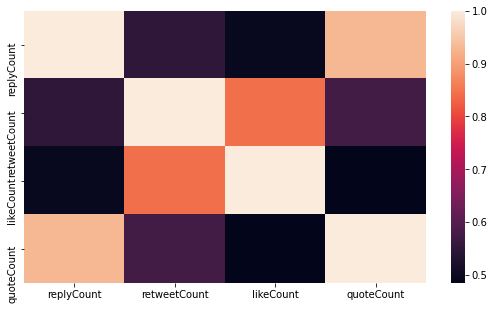

In [99]:
variables= ['replyCount','retweetCount','likeCount','quoteCount']
plt.figure(figsize=(9,5))
sns.heatmap(df[variables].corr())

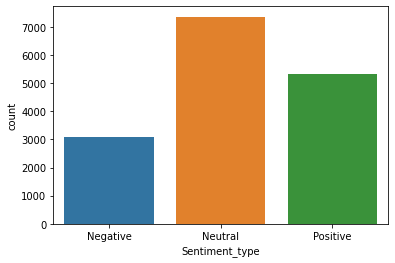

In [100]:
sns.countplot(df['Sentiment_type'])

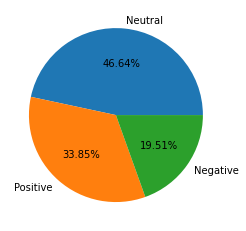

In [101]:
plt.pie(sentiment_count,labels=sentiment_count.index,autopct='%1.2f%%')
plt.show()

Text(0, 0.5, 'Tweet Count')

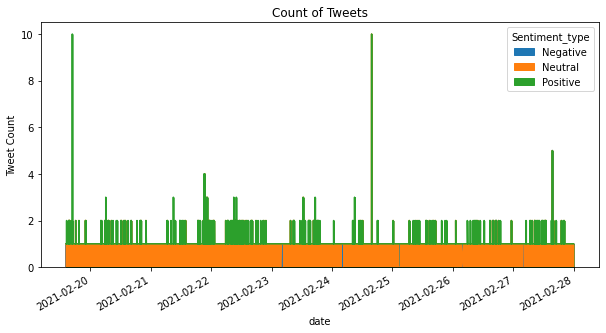

In [102]:
#Distribution of tweet count by sentiment over the time period
df.groupby(['date','Sentiment_type'])['renderedContent'].count().unstack().plot(kind='area', figsize=(10,5))
plt.title('Count of Tweets')
plt.ylabel('Tweet Count')

(array([3.606e+03, 5.104e+03, 3.358e+03, 3.621e+03, 6.300e+01, 1.500e+01,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([  8. ,  93.2, 178.4, 263.6, 348.8, 434. , 519.2, 604.4, 689.6,
        774.8, 860. ]),
 <a list of 10 Patch objects>)

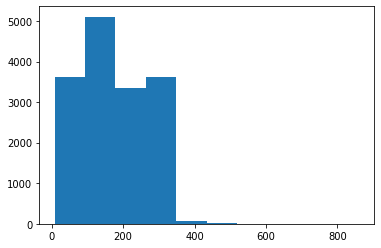

In [103]:
plt.hist(df['renderedContent'].str.len())

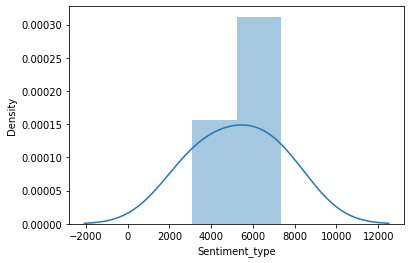

In [104]:
sns.distplot(sentiment_count)

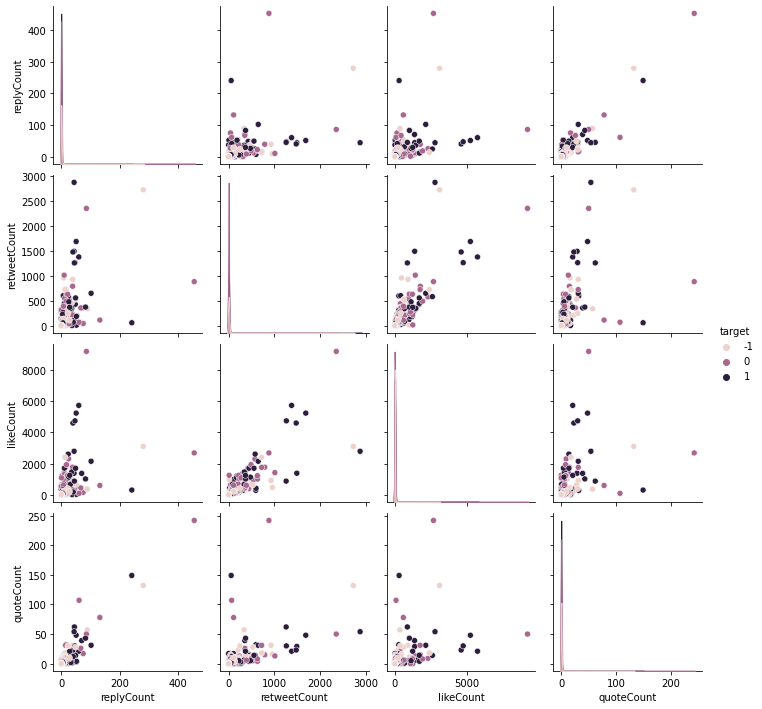

In [105]:
sns.pairplot(df,'target')

In [106]:
Tweet_count.max()

10

In [107]:
Tweet_count.min()

1

Text Preprocessing

In [44]:
import re

def preprocess_text(text):
    #lower case
    text = text.lower()
    
    #replace links with " "
    text = re.sub(r"http\S+", " ", text)

    #replace mentions with " "
    text = re.sub(r"@\S+", " ", text)

    #replace hashtags with " "
    text = re.sub(r"#\S+", " ", text)

    #replacing .com with " "
    text = re.sub(r".com\S+", " ", text)

    #dealing with contractions
    text = re.sub(r"won't\S+", " would not", text)

    #removing space from word
    text = [word.strip() for word in text.split()]

    #removing words less than 2 characters
    text = [word for word in text if len(word)>2]

    #removing twitter amp
    text = [word for word in text if word != 'amp']


    text = ' '.join(text)
    return text

In [109]:
df['tweet']=df['renderedContent'].apply(preprocess_text)

In [110]:
df.head()

,date,renderedContent,replyCount,retweetCount,likeCount,quoteCount,Sentiment_type,tweet,target
0,2021-02-27 23:57:28+00:00,"The Rivers State GOC, commander of the 6th Div...",0,0,0,0,Negative,"the rivers state goc, the 6th division who the...",-1
1,2021-02-27 23:56:21+00:00,#EndSars: FG Created Over N25B To Supplement T...,0,0,0,0,Neutral,created over n25b supplement the plan for yout...,0
2,2021-02-27 23:56:07+00:00,I repeat again this @MBuhari regime has shown ...,2,0,2,0,Neutral,repeat again this regime has shown government ...,0
3,2021-02-27 23:53:24+00:00,Bandits actions are being justified as mere ac...,0,1,3,0,Positive,bandits actions are being justified mere actio...,1
4,2021-02-27 23:51:00+00:00,#EndSARS #EndBadGoveranceInNigeria twitter.com...,0,1,1,0,Neutral,twitter,0


In [111]:
to_drop=['renderedContent','date','replyCount','retweetCount','likeCount','quoteCount']

In [112]:
df.drop(to_drop,axis=1, inplace=True)

In [113]:
df.head()

,Sentiment_type,tweet,target
0,Negative,"the rivers state goc, the 6th division who the...",-1
1,Neutral,created over n25b supplement the plan for yout...,0
2,Neutral,repeat again this regime has shown government ...,0
3,Positive,bandits actions are being justified mere actio...,1
4,Neutral,twitter,0


In [120]:
from sklearn.model_selection import train_test_split

In [139]:
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [145]:
vectorizer= TfidfVectorizer(use_idf=True, ngram_range=(1,2))

train_matrix = vectorizer.fit_transform(train['tweet'])
test_matrix = vectorizer.transform(test['tweet'])

In [146]:
Lr=LogisticRegression()

In [147]:
x_train = train_matrix
x_test = test_matrix
y_train = train['target']
y_test = test['target']

In [148]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((12397, 116565), (3372, 116565), (12397,), (3372,))

In [149]:
Lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [150]:
prediction = Lr.predict(test_matrix)

In [151]:
from sklearn.metrics import classification_report
accuracy = classification_report(prediction,y_test)

In [153]:
print(accuracy)

              precision    recall  f1-score   support

          -1       0.51      0.80      0.62       402
           0       0.84      0.85      0.84      1574
           1       0.86      0.71      0.78      1396

    accuracy                           0.78      3372
   macro avg       0.74      0.78      0.75      3372
weighted avg       0.81      0.78      0.79      3372

